# 1. Introducción al Dataset y Carga de Datos

In [6]:
# Importamos pandas para manejar el dataset
import pandas as pd

# Cargamos el dataset desde el archivo xlsx
# Nota: Modifique la ruta al archivo si fuese necesario
df = pd.read_excel('data/Datos_proyecto.xlsx')

# Mostramos las primeras filas para conocer la estructura de los datos
print("Primeras 5 filas del dataset:")
display(df.head())

# Obtención de información general sobre las columnas y tipos de datos
print("\nInformación general del dataset:")
df.info()

Primeras 5 filas del dataset:


,textos,labels
0,"""Aprendizaje"" y ""educación"" se consideran sinó...",4
1,Para los niños más pequeños (bebés y niños peq...,4
2,"Además, la formación de especialistas en medic...",3
3,En los países de la OCDE se tiende a pasar de ...,4
4,Este grupo se centró en las personas que padec...,3



Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2424 entries, 0 to 2423
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   textos  2424 non-null   object
 1   labels  2424 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 38.0+ KB


In [7]:
# Poner una columna de id
df.reset_index(inplace=True)
df.rename(columns={'index': 'id'}, inplace=True)
df['id'] = df['id'] + 1  # Empezar IDs desde 1
#df.set_index('id', inplace=True)
print("\nDataset con columna de ID:")
display(df.head())  # Mostrar las primeras filas con la nueva columna de ID


Dataset con columna de ID:


,id,textos,labels
0,1,"""Aprendizaje"" y ""educación"" se consideran sinó...",4
1,2,Para los niños más pequeños (bebés y niños peq...,4
2,3,"Además, la formación de especialistas en medic...",3
3,4,En los países de la OCDE se tiende a pasar de ...,4
4,5,Este grupo se centró en las personas que padec...,3


# 2. Análisis descriptivo de las opiniones

En esta sección nos centraremos en analizar el campo "textos" del dataset. Este campo contiene una opinión en español. Nuestro objetivo es entender la calidad, cantidad y características textuales de esta información para preparar análisis posteriores.

## Objetivos:

- Identificar cantidad y proporción de valores nulos o vacíos en la columna "textos".  
- Calcular estadísticas básicas como longitud del texto: media, mínimo y máximo.  
- Mostrar visualmente algunas muestras representativas para observar variedades y características del texto.  

## Desarrollo:

1. Se verifican nulos o cadenas vacías en la columna de descripción para evaluar calidad y completitud.  
2. Se calculan estadísticas básicas de longitud de cada opinión para conocer dispersión y valores extremos.  

In [8]:
import matplotlib.pyplot as plt

# Verificamos nulos y vacíos en la columna textos
num_nulls = df['textos'].isnull().sum()
num_empty = (df['textos'].str.strip() == '').sum()

print(f"Número de valores nulos en 'textos': {num_nulls}")
print(f"Número de valores vacíos en 'textos': {num_empty}")

# Calculamos longitud de cada texto
df['text_length'] = df['textos'].str.len()

# Estadísticas básicas sobre la longitud
text_length_stats = df['text_length'].describe()
print("\nEstadísticas básicas de longitud de texto:")
print(text_length_stats)

# Visualización de algunas muestras representativas
print("\nEjemplos de textos:")
display(df[['textos', 'labels']].sample(5, random_state=42))

#proporcion de cada label en el dataset
print(df['labels'].value_counts(normalize=True).round(3))

Número de valores nulos en 'textos': 0
Número de valores vacíos en 'textos': 0

Estadísticas básicas de longitud de texto:
count    2424.000000
mean      683.223185
std       223.563695
min       303.000000
25%       513.000000
50%       647.000000
75%       809.250000
max      1492.000000
Name: text_length, dtype: float64

Ejemplos de textos:


,textos,labels
1490,"Por lo general, se entiende que los trastornos...",3
387,"En la mayoría de los contratos, el objetivo es...",3
1419,Las tasas de consumo de alcohol y tabaquismo n...,3
410,Hubo una disminución constante en el porcentaj...,4
482,La oferta insuficiente de programas vocacional...,4


labels
4    0.423
3    0.369
1    0.208
Name: proportion, dtype: float64


# 3. Procesamiento de texto: tokenización y limpieza de palabras

En esta sección se va a procesar texto para análisis basados en palabras. Usaremos el campo "textos" y transformaremos cada texto en una lista de palabras limpias y significativas. Este paso es fundamental para realizar un análisis posterior de frecuencia y relevancia de palabras.

## Objetivos:

- Tokenizar las descripciones: separar cada texto en palabras individuales.  
- Limpiar el texto: pasar a minúsculas, eliminar signos de puntuación y palabras vacías (stopwords).  
- Crear un dataframe con las palabras procesadas para análisis posteriores.

## Desarrollo:

1. Importar librerías necesarias para procesamiento de texto, como `nltk`.  
2. Descargar y definir las stopwords en español.
3. Definir función para limpiar y tokenizar el texto.  
4. Aplicar la función a la columna "textos" y almacenar el resultado en una nueva columna.  
5. Crear un dataframe de palabras tokenizadas para análisis posterior.

In [9]:
import nltk
import string
import unicodedata
from nltk.corpus import stopwords

# Descargar stopwords si no están ya descargadas
nltk.download('stopwords')

# Definir las stopwords en español
stop_words = set(stopwords.words('spanish'))

def strip_accents(s: str):
    # Normaliza áéíóúñ -> aeioun (conservando ñ manualmente)
    s = s.replace("ñ", "ny")
    s = unicodedata.normalize('NFD', s).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    s = s.replace("ny", "ñ")
    return s

# Función para limpiar y tokenizar texto
def clean_tokenize(text):
    if pd.isnull(text):
        return []
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    # Quitar tildes
    tokens = [strip_accents(word) for word in tokens]
    return tokens

# Aplicar la función a la columna Description
df['tokens'] = df['textos'].apply(clean_tokenize)

print("Ejemplos de tokens en los primeros textos:")
display(df[['textos', 'tokens']].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Ejemplos de tokens en los primeros textos:


,textos,tokens
0,"""Aprendizaje"" y ""educación"" se consideran sinó...","[aprendizaje, educacion, consideran, sinonimos..."
1,Para los niños más pequeños (bebés y niños peq...,"[niños, pequeños, bebes, niños, pequeños, capa..."
2,"Además, la formación de especialistas en medic...","[ademas, formacion, especialistas, medicina, g..."
3,En los países de la OCDE se tiende a pasar de ...,"[paises, ocde, tiende, pasar, cursos, obligato..."
4,Este grupo se centró en las personas que padec...,"[grupo, centro, personas, padecen, trastornos,..."


# 4. Análisis exploratorio de palabras más frecuentes y representativas

En esta sección exploraremos las palabras extraídas en la tokenización y limpieza de los textos. Nuestro objetivo es identificar las palabras que aparecen con mayor frecuencia y que mejor se asocian al objetivo de desarrollo sostenible.

## Objetivos:

- Calcular la frecuencia de aparición de cada palabra en todos los textos.  
- Visualizar las palabras más frecuentes mediante tablas y gráficos.  
- Analizar la relevancia de las palabras para entender el vocabulario característico del dataset.

## Desarrollo:

1. Aplanar la lista de tokens en una sola lista.  
2. Contar la frecuencia de cada palabra usando `Counter` de la librería `collections`.  
3. Mostrar las 20 palabras más comunes en una tabla.  
4. Graficar con una barra las palabras más frecuentes.

Las 20 palabras más frecuentes en los textos:


,Word,Frequency
0,salud,1107
1,pobreza,1019
2,educacion,992
3,paises,962
4,atencion,900
5,estudiantes,741
6,ocde,587
7,escuelas,586
8,años,559
9,servicios,548


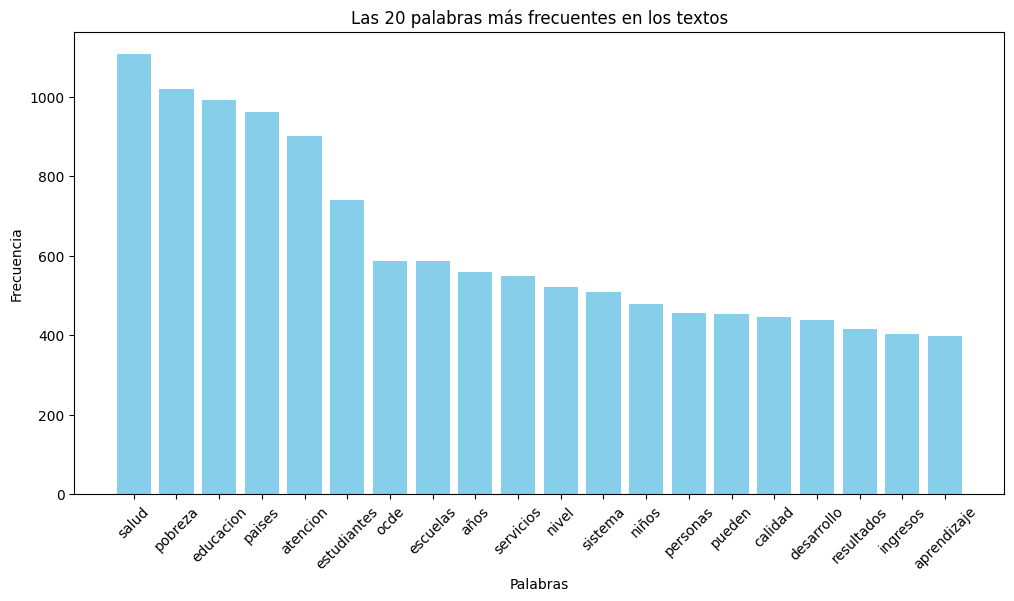

In [10]:
from collections import Counter
import matplotlib.pyplot as plt

# Aplanar la lista de tokens
all_tokens = [token for tokens_list in df['tokens'] for token in tokens_list]

# Contar frecuencia de palabras
word_counts = Counter(all_tokens)

# Obtener las 20 palabras más comunes
most_common_words = word_counts.most_common(20)

# Crear dataframe para visualización
freq_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

print("Las 20 palabras más frecuentes en los textos:")
display(freq_df)

# Graficar las palabras más frecuentes
plt.figure(figsize=(12,6))
plt.bar(freq_df['Word'], freq_df['Frequency'], color='skyblue')
plt.xticks(rotation=45)
plt.title('Las 20 palabras más frecuentes en los textos')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.show()

# 5. Descripción de la variable objetivo


Distribución de niveles de label:
labels
4    1025
3     894
1     505
Name: count, dtype: int64


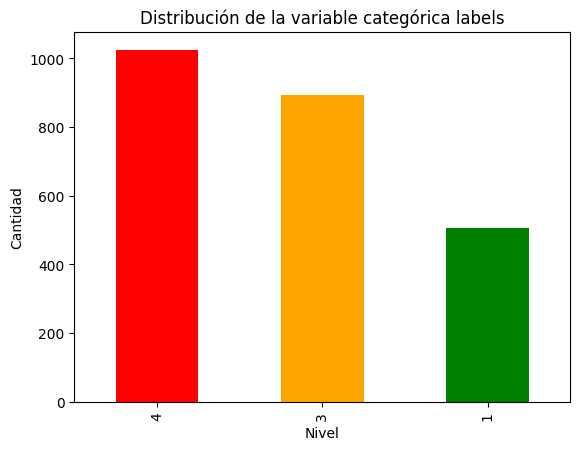

In [11]:
# Mostrar conteos
print("\nDistribución de niveles de label:")
print(df['labels'].value_counts())

# Graficar distribución
df['labels'].value_counts().plot(kind='bar', color=['red', 'orange', 'green'])
plt.title('Distribución de la variable categórica labels')
plt.xlabel('Nivel')
plt.ylabel('Cantidad')
plt.show()

# Limpieza más robusta (Stemming y Lematización)

Se elige lematización porque es mejor en este contexto

In [12]:
# STEMMING

import re
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer

# --- asegurar recursos de NLTK ---
try:
    _ = stopwords.words('spanish')
except LookupError:
    nltk.download('stopwords')

try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    nltk.download('punkt_tab')

STOP_ES = set(stopwords.words('spanish'))
STEM = SnowballStemmer('spanish')


def basic_clean(text: str):
    text = text.lower()
    text = strip_accents(text)
    # Quitar URLs, menciones, hashtags, números
    text = re.sub(r"(http|https)://\S+|www\.\S+", " ", text)
    text = re.sub(r"[@#]\w+", " ", text)
    text = re.sub(r"\d+", " ", text)
    # Dejar solo letras y espacios
    text = re.sub(r"[^a-zñáéíóúü\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

def tokenize_filter_stem(text: str):
    # Tokenizar
    toks = word_tokenize(text, language='spanish')
    # Filtrar: solo alfabético, quitar stopwords y tokens de 1-2 letras (ruido)
    toks = [t for t in toks if t.isalpha() and t not in STOP_ES and len(t) > 2]
    # Stemming español
    toks = [STEM.stem(t) for t in toks]
    return " ".join(toks)

def clean_pipeline(text: str):
    if not isinstance(text, str):
        text = "" if pd.isna(text) else str(text)
    return tokenize_filter_stem(basic_clean(text))

df['texto_stemming'] = df['textos'].apply(clean_pipeline)

# Chequeos rápidos
print("Ejemplo antes/después:\n")
display(df[['textos','texto_stemming']].head())

Ejemplo antes/después:



,textos,texto_stemming
0,"""Aprendizaje"" y ""educación"" se consideran sinó...",aprendizaj educ consider sinon escolariz forma...
1,Para los niños más pequeños (bebés y niños peq...,niñ mas pequeñ beb niñ pequeñ capacit especial...
2,"Además, la formación de especialistas en medic...",adem formacion especial medicin general tambi ...
3,En los países de la OCDE se tiende a pasar de ...,pais ocde tiend pas curs obligatori optat abie...
4,Este grupo se centró en las personas que padec...,grup centr person padec trastorn mental comorb...


In [13]:
# LEMATIZACION
import spacy
from spacy.cli import download

try:
    nlp = spacy.load("es_core_news_sm")
except OSError:
    download("es_core_news_sm")
    nlp = spacy.load("es_core_news_sm")

nlp = spacy.load("es_core_news_sm")

def clean_text(text: str):
    if not isinstance(text, str):
        return ""
    # Minúsculas
    text = text.lower()
    # Quitar URLs y menciones/hashtags/números
    text = re.sub(r"(http|https)://\S+|www\.\S+", " ", text)
    text = re.sub(r"[@#]\w+", " ", text)
    text = re.sub(r"\d+", " ", text)
    # Quitar caracteres no alfabéticos (dejamos acentos y ñ)
    text = re.sub(r"[^a-záéíóúüñ\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

def lemmatize_text(text: str):
    doc = nlp(text)
    toks = [tok.lemma_.lower() for tok in doc if tok.is_alpha and not tok.is_stop]
    return " ".join(toks)

def pipeline(text: str):
    return lemmatize_text(clean_text(text))

df['texto_lematizacion'] = df['textos'].apply(pipeline)

# Chequeos rápidos
print("Ejemplo antes/después:\n")
display(df[['textos','texto_lematizacion']].head())

✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
Ejemplo antes/después:



,textos,texto_lematizacion
0,"""Aprendizaje"" y ""educación"" se consideran sinó...",aprendizaje educación considerar sinónir escol...
1,Para los niños más pequeños (bebés y niños peq...,niño pequeño bebé niño pequeño capacitación es...
2,"Además, la formación de especialistas en medic...",formación especialista medicina general inclui...
3,En los países de la OCDE se tiende a pasar de ...,país ocde tender pasar curso obligatorio optat...
4,Este grupo se centró en las personas que padec...,grupo centrar persona padecer trastorno mental...


# TF-IDF

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Configuración TF-IDF
tfidf = TfidfVectorizer(
    analyzer="word",
    ngram_range=(1, 2),
    min_df=5,           # ignora términos muy raros
    max_df=0.9,         # ignora términos súper frecuentes (ruido)
    sublinear_tf=True,  # tf = 1 + log(tf)
    norm="l2",          # normaliza por documento
    lowercase=False,    # ya limpiamos/normalizamos antes
    strip_accents=None, # preservamos acentos; ya controlados en texto
    max_features=50000  # límite superior de vocabulario (ajustable)
)



train_df, test_df = train_test_split(
    df, test_size=0.15, stratify=df['labels'], random_state=42
)


X_train = tfidf.fit_transform(train_df["texto_lematizacion"].astype(str))
#X_train = tfidf.fit_transform(train_df["texto_stemming"].astype(str))
y_train = train_df["labels"].values


X_test  = tfidf.transform(test_df["texto_lematizacion"].astype(str))
#X_test  = tfidf.transform(test_df["texto_stemming"].astype(str))
y_test  = test_df["labels"].values

print("Shapes ->",
      f"X_train: {X_train.shape}",
      #f"X_valid: {X_valid.shape}",
      f"X_test: {X_test.shape}",
      sep="\n")


Shapes ->
X_train: (2060, 3626)
X_test: (364, 3626)


# Modelo RegLog

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import (
    classification_report, f1_score, confusion_matrix,
    precision_recall_curve, average_precision_score
)


base_lr = LogisticRegression(
    penalty="l2",
    class_weight="balanced",
    solver="liblinear",
    max_iter=2000,
    multi_class="ovr",
    n_jobs=None
)

param_grid = {
    "C": [0.1, 0.5, 1.0, 2.0, 5.0]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearch para hiperparámetros
gcv = GridSearchCV(
    estimator=base_lr,
    param_grid=param_grid,
    scoring="f1_macro",
    cv=cv,
    n_jobs=-1,
    verbose=1
)

gcv.fit(X_train, y_train)
best_lr = gcv.best_estimator_
print("\nMejor C:", gcv.best_params_, " | CV f1_macro:", round(gcv.best_score_, 4))

Fitting 5 folds for each of 5 candidates, totalling 25 fits

Mejor C: {'C': 5.0}  | CV f1_macro: 0.9775


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(



TRAIN — Macro F1: 0.999

TRAIN — Reporte por clase:
              precision    recall  f1-score   support

           1      0.998     1.000     0.999       429
           3      0.999     0.999     0.999       760
           4      1.000     0.999     0.999       871

    accuracy                          0.999      2060
   macro avg      0.999     0.999     0.999      2060
weighted avg      0.999     0.999     0.999      2060



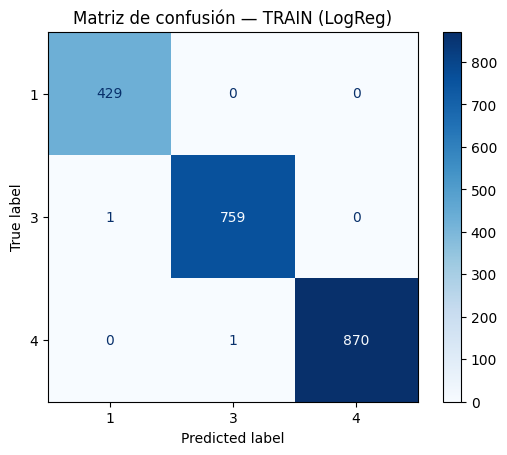

In [16]:

from sklearn.metrics import ConfusionMatrixDisplay


classes = sorted(np.unique(y_train))

y_train_pred = best_lr.predict(X_train)
print("\nTRAIN — Macro F1:", round(f1_score(y_train, y_train_pred, average="macro"), 4))
print("\nTRAIN — Reporte por clase:")
print(classification_report(y_train, y_train_pred, digits=3))

cm_t = confusion_matrix(y_train, y_train_pred, labels=classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_t, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de confusión — TRAIN (LogReg)")
plt.show()


TEST — Macro F1: 0.9703

TEST — Reporte por clase:
              precision    recall  f1-score   support

           1      0.973     0.947     0.960        76
           3      0.970     0.970     0.970       134
           4      0.974     0.987     0.981       154

    accuracy                          0.973       364
   macro avg      0.972     0.968     0.970       364
weighted avg      0.973     0.973     0.972       364



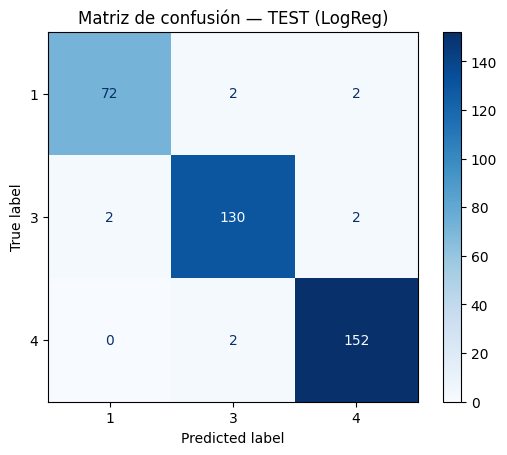

In [17]:

y_test_pred = best_lr.predict(X_test)
print("\nTEST — Macro F1:", round(f1_score(y_test, y_test_pred, average="macro"), 4))
print("\nTEST — Reporte por clase:")
print(classification_report(y_test, y_test_pred, digits=3))

cm_t = confusion_matrix(y_test, y_test_pred, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_t, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de confusión — TEST (LogReg)")
plt.show()

In [18]:
import joblib
joblib.dump(best_lr, "models/best_lr.pkl")
joblib.dump(tfidf, "models/tfidf.pkl")

['models/tfidf.pkl']

In [19]:

feature_names = np.array(tfidf.get_feature_names_out())
coefs = best_lr.coef_  # shape: (n_classes, n_features)
TOPK = 20

for idx, c in enumerate(classes):
    top_idx = np.argsort(coefs[idx])[-TOPK:]
    terms = feature_names[top_idx]
    weights = coefs[idx][top_idx]
    order = np.argsort(weights)
    terms = terms[order]
    weights = weights[order]
    print(f"\nTop {TOPK} términos indicativos para ODS {c}:")
    for t, w in zip(terms, weights):
        print(f"{t:30s}  {w: .4f}")


Top 20 términos indicativos para ODS 1:
vivir                            2.0898
relativo                         2.1401
brasil                           2.1648
pobreza infantil                 2.2070
crecimiento                      2.2878
umbral                           2.3092
familia                          2.3181
niño                             2.4310
multidimensional                 2.4399
vivienda                         2.5721
transferencia                    2.7614
protección                       3.1352
empleo                           3.1861
protección social                3.6282
social                           4.0376
privación                        4.5672
ingreso                          4.9931
hogar                            5.4004
pobre                            7.3972
pobreza                          15.0379

Top 20 términos indicativos para ODS 3:
vih                              2.2642
salud mental                     2.4110
hospitalario                     2.47

# Aplicación modelo RegLog

In [20]:
new_df = pd.read_excel('data/Datos de prueba_proyecto.xlsx')
best_lr = joblib.load("models/best_lr.pkl")
tfidf = joblib.load("models/tfidf.pkl")


if "id" not in new_df.columns:
    new_df = new_df.reset_index(drop=False).rename(columns={"index": "id"})
new_df["id"] = new_df["id"] + 1

# preprocesamiento con lematización
new_df["text_lematizacion"] = new_df["Textos_espanol"].apply(pipeline)

# usar el mismo tfidf que se entrenó
X_nuevo = tfidf.transform(new_df["text_lematizacion"].astype(str))

# predicción
y_nuevo_pred = best_lr.predict(X_nuevo)

out = pd.concat(
    [
        new_df[["id", "Textos_espanol"]].reset_index(drop=True),
        pd.Series(y_nuevo_pred, name="pred_label").reset_index(drop=True)
    ],
    axis=1
)

out.to_excel("outputs/predicciones_logreg.xlsx", index=False)

print("\nListo. Archivos generados:")
print("- outputs/predicciones_logreg.xlsx")



Listo. Archivos generados:
- outputs/predicciones_logreg.xlsx


# Árbol de decisión

In [21]:

from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier


Y=df['labels']
X=df.drop(['labels'], axis=1)

# Dividimos los datos en entrenamiento y test
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

train_df, test_df = train_test_split(
    df, test_size=0.15, stratify=df['labels'], random_state=0
)

X_train = tfidf.fit_transform(train_df["texto_lematizacion"].astype(str))
#X_train = tfidf.fit_transform(train_df["texto_stemming"].astype(str))
y_train = train_df["labels"].values


X_test  = tfidf.transform(test_df["texto_lematizacion"].astype(str))
#X_test  = tfidf.transform(test_df["texto_stemming"].astype(str))
y_test  = test_df["labels"].values


particiones = KFold(n_splits=10, shuffle=True, random_state = 0)
param_grid = {'criterion':['gini', 'entropy'],'max_depth':[4,6,8,10,20,30,40]}

arbol = DecisionTreeClassifier(random_state = 0)
mejor_modelo = GridSearchCV(arbol, param_grid, cv=particiones)

display(mejor_modelo)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10, 20, 30, 40]})

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay


mejor_modelo.fit(X_train,y_train)

print(mejor_modelo.best_params_)

arbol_final = mejor_modelo.best_estimator_

{'criterion': 'gini', 'max_depth': 30}



TRAIN — Reporte por clase:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       429
           3       1.00      1.00      1.00       760
           4       1.00      1.00      1.00       871

    accuracy                           1.00      2060
   macro avg       1.00      1.00      1.00      2060
weighted avg       1.00      1.00      1.00      2060



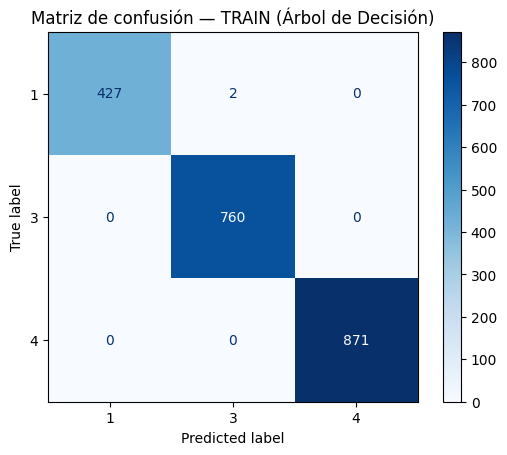

In [23]:
y_train_pred = arbol_final.predict(X_train)
cm_train = confusion_matrix(y_train, y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=arbol_final.classes_)
disp.plot(cmap=plt.cm.Blues)

print("\nTRAIN — Reporte por clase:")
print(classification_report(y_train, y_train_pred))

plt.title("Matriz de confusión — TRAIN (Árbol de Decisión)")
plt.show()



TEST — Reporte por clase:
              precision    recall  f1-score   support

           1       0.92      0.92      0.92        76
           3       0.93      0.91      0.92       134
           4       0.94      0.96      0.95       154

    accuracy                           0.93       364
   macro avg       0.93      0.93      0.93       364
weighted avg       0.93      0.93      0.93       364



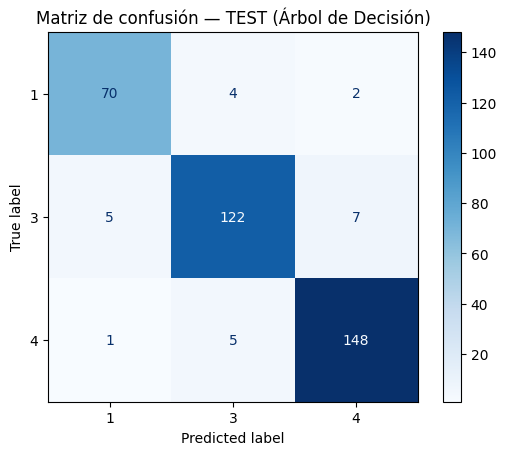

In [24]:
y_test_pred = arbol_final.predict(X_test)
cm_test = confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=arbol_final.classes_)
disp.plot(cmap=plt.cm.Blues)

print("\nTEST — Reporte por clase:")
print(classification_report(y_test, y_test_pred))

plt.title("Matriz de confusión — TEST (Árbol de Decisión)")
plt.show()

In [25]:
joblib.dump(arbol_final, "models/arbol_final.pkl")
joblib.dump(tfidf, "models/tfidf.pkl")

['models/tfidf.pkl']

# Aplicación modelo de Árbol de Decisión

In [26]:
new_df = pd.read_excel('data/Datos de prueba_proyecto.xlsx')
arbol_final = joblib.load("models/arbol_final.pkl")
tfidf = joblib.load("models/tfidf.pkl")

if "id" not in new_df.columns:
    new_df = new_df.reset_index(drop=False).rename(columns={"index": "id"})
new_df["id"] = new_df["id"] + 1

# preprocesamiento con lematización
new_df["text_lematizacion"] = new_df["Textos_espanol"].apply(pipeline)

# usar el mismo tfidf que se entrenó
X_nuevo = tfidf.transform(new_df["text_lematizacion"].astype(str))

# predicción
y_nuevo_pred = arbol_final.predict(X_nuevo)

out = pd.concat(
    [
        new_df[["id", "Textos_espanol"]].reset_index(drop=True),
        pd.Series(y_nuevo_pred, name="pred_label").reset_index(drop=True)
    ],
    axis=1
)

out.to_excel("outputs/predicciones_arbdec.xlsx", index=False)

print("\nListo. Archivos generados:")
print("- outputs/predicciones_arbdec.xlsx")


Listo. Archivos generados:
- outputs/predicciones_arbdec.xlsx


# Modelo SVM (Support Vector Machines) Lineal

In [27]:
import os, numpy as np, pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
import joblib

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
os.makedirs("models", exist_ok=True)
os.makedirs("outputs", exist_ok=True)


## Pipeline TF-IDF + LinearSVC y GridSearc

In [28]:
pipe_svm = Pipeline(steps=[
    ("tfidf", TfidfVectorizer(
        ngram_range=(1,2),
        min_df=5,
        max_df=0.9,
        sublinear_tf=True,
        norm="l2",
        max_features=50000,
        lowercase=False,  # ya viene en lemas normalizados
    )),
    ("clf", LinearSVC(
        random_state=RANDOM_STATE,
        dual=True  # bueno cuando #features >> #muestras (TF-IDF)
    )),
])

param_grid = {
    "clf__C": [0.1, 0.5, 1, 2, 5, 10],
    "clf__class_weight": [None, "balanced"],
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

gcv_svm = GridSearchCV(
    estimator=pipe_svm,
    param_grid=param_grid,
    scoring="f1_macro",
    cv=cv,
    n_jobs=-1,
    verbose=2
)

X = df["texto_lematizacion"].astype(str)
y = df["labels"].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, stratify=y, random_state=RANDOM_STATE
)

gcv_svm.fit(X_train, y_train)
print("Mejores params:", gcv_svm.best_params_)
print("CV Macro F1:", round(gcv_svm.best_score_, 4))

best_svm = gcv_svm.best_estimator_


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Mejores params: {'clf__C': 0.1, 'clf__class_weight': 'balanced'}
CV Macro F1: 0.9785


# Evalucaión en TRAIN


TRAIN — Reporte por clase:
              precision    recall  f1-score   support

           1       0.99      0.99      0.99       429
           3       1.00      0.99      1.00       760
           4       1.00      1.00      1.00       871

    accuracy                           0.99      2060
   macro avg       0.99      0.99      0.99      2060
weighted avg       0.99      0.99      0.99      2060



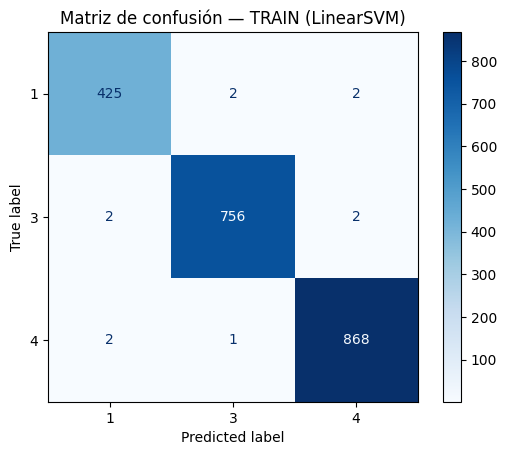

In [29]:
y = df["labels"].astype(int)

y_train_pred = best_svm.predict(X_train)
acc = accuracy_score(y_train, y_train_pred)

# Matriz de confusión
cm = confusion_matrix(y_train, y_train_pred, labels=sorted(y.unique()))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_svm.classes_)
disp.plot(cmap=plt.cm.Blues)

print("\nTRAIN — Reporte por clase:")
print(classification_report(y_train, y_train_pred))

plt.title("Matriz de confusión — TRAIN (LinearSVM)")
plt.show()


## Evaluación en TEST + matriz de confusión


TEST — Reporte por clase:
              precision    recall  f1-score   support

           1       0.97      0.95      0.96        76
           3       0.97      0.96      0.96       134
           4       0.96      0.99      0.97       154

    accuracy                           0.97       364
   macro avg       0.97      0.96      0.97       364
weighted avg       0.97      0.97      0.97       364



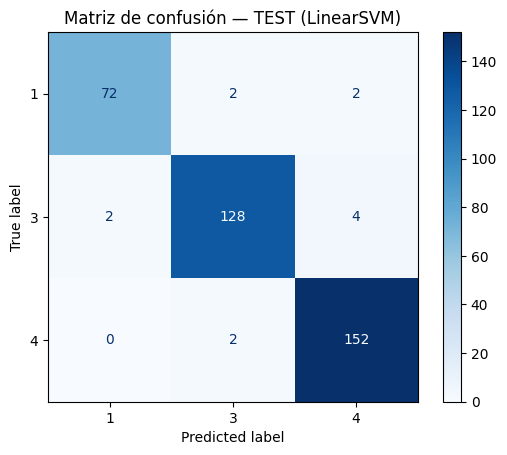

In [30]:


y_pred = best_svm.predict(X_test)
acc = accuracy_score(y_test, y_pred)

# Matriz de confusión
cm_test = confusion_matrix(y_test, y_pred, labels=sorted(y.unique()))

disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=best_svm.classes_)
disp.plot(cmap=plt.cm.Blues)

print("\nTEST — Reporte por clase:")
print(classification_report(y_test, y_pred))

plt.title("Matriz de confusión — TEST (LinearSVM)")
plt.show()


In [31]:
joblib.dump(best_svm, "models/text_svm_lineal.pkl")
joblib.dump(tfidf, "models/tfidf.pkl")

['models/tfidf.pkl']

## Top términos por clase

In [32]:
def top_terms_linear(model, topn=20):
    tfidf = model.named_steps["tfidf"]
    clf = model.named_steps["clf"]
    feature_names = np.array(tfidf.get_feature_names_out())

    if not hasattr(clf, "coef_"):
        raise ValueError("El clasificador no expone coef_. Usa LinearSVC o LogReg.")

    for idx, clase in enumerate(clf.classes_):
        coefs = clf.coef_[idx]
        top_pos = np.argsort(coefs)[-topn:][::-1]
        print(f"\n=== Clase {clase} | Top +{topn} términos ===")
        print(", ".join(feature_names[top_pos]))

top_terms_linear(best_svm, topn=20)



=== Clase 1 | Top +20 términos ===
pobreza, pobre, hogar, ingreso, privación, social, protección social, protección, transferencia, empleo, crecimiento, familia, niño, multidimensional, pobreza infantil, umbral, vivir, tasa pobreza, vivienda, monetario

=== Clase 3 | Top +20 términos ===
salud, médico, atención, paciente, enfermedad, sanitario, hospital, tratamiento, mental, droga, mortalidad, alcohol, atención primario, servicio, medicamento, consumo, hospitalario, muerte, clínico, salud mental

=== Clase 4 | Top +20 términos ===
educación, escuela, estudiante, educativo, docente, aprendizaje, escolar, alumno, profesor, enseñanza, maestro, habilidad, evaluación, formación, superior, sistema educativo, pisa, universidad, rendimiento, padre


## Guardar y reutilizar (persistencia)

In [33]:
def predecir_excel_svm(path_excel, texto_col="Textos_espanol", out_path="outputs/predicciones_svm.xlsx"):
    modelo = joblib.load("models/text_svm_lineal.pkl")
    df_new = pd.read_excel(path_excel)
    if texto_col not in df_new.columns:
        raise ValueError(f"No se encontró la columna '{texto_col}' en el archivo.")
    X_new = df_new[texto_col].astype(str)
    y_hat = modelo.predict(X_new)
    salida = df_new.assign(pred_label=y_hat)
    os.makedirs(os.path.dirname(out_path), exist_ok=True)
    salida.to_excel(out_path, index=False)
    print(f"Predicciones guardadas en {out_path}")


predecir_excel_svm("data/Datos de prueba_proyecto.xlsx", texto_col="Textos_espanol")

Predicciones guardadas en outputs/predicciones_svm.xlsx


# Clasifiador con embeddings

In [34]:
import os, numpy as np, pandas as pd, joblib, matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sentence_transformers import SentenceTransformer

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)


# Calculo de Embeddings (SBERT)
Genera los vectores densos del corpus completo con Sentence-BERT (paraphrase-multilingual-MiniLM-L12-v2) y guarda el arreglo en disco.

- Renombra textos → texto (consistencia).
- Construye X_all (lista de textos) y y_all (etiquetas).
- Codifica a E_all (embeddings normalizados L2).
- Persiste E_all con np.save para reusar sin recomputar.

In [35]:
# 1) Calcular embeddings
from sentence_transformers import SentenceTransformer
import numpy as np

import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
MODEL_NAME = "paraphrase-multilingual-MiniLM-L12-v2"
sbert = SentenceTransformer(MODEL_NAME, device=device)

df = df.rename(columns={"textos": "texto"})  # si aplica
X_all = df["texto"].astype(str).tolist()
y_all = df["labels"].astype(int).to_numpy()

E_all = sbert.encode(
    X_all, batch_size=128, show_progress_bar=True,
    convert_to_numpy=True, normalize_embeddings=True
)
np.save("/content/E_all.npy", E_all)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/19 [00:00<?, ?it/s]

#Split por índices (train/test)
Crea la partición reproducible manteniendo el alineamiento entre textos, etiquetas y embeddings.
- Genera idx_tr y idx_te con stratify=y_all y random_state=42.
- Indiza E_all y y_all para obtener E_tr, E_te, y_tr, y_te.
- Evita recalcular embeddings en cada validación o experimento.

In [36]:
# 2) Split por índices para alinear (y evitar recomputar)
from sklearn.model_selection import train_test_split
idx = np.arange(len(X_all))
idx_tr, idx_te = train_test_split(idx, test_size=0.15, stratify=y_all, random_state=42)
E_tr, E_te = E_all[idx_tr], E_all[idx_te]
y_tr, y_te = y_all[idx_tr], y_all[idx_te]


#GridSearch sobre embeddings
Entrena y selecciona hiperparámetros del clasificador sin recalcular embeddings.
- Pipeline: StandardScaler → LogisticRegression (balanced, lbfgs).
- Búsqueda de C ∈ {0.25, 0.5, 1, 2, 4} con 5-fold estratificado.
- Métrica de selección: F1-macro.
- Ajusta el modelo sobre E_tr, y_tr.

In [37]:
# 3) GridSearch solo sobre los embeddings (rápido y estable)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, GridSearchCV

pipe = Pipeline([
    ("scaler", StandardScaler(with_mean=True, with_std=True)),
    ("clf", LogisticRegression(max_iter=5000, class_weight="balanced",
                               solver="lbfgs", n_jobs=-1, random_state=42)),
])

param_grid = {"clf__C":[0.25, 0.5, 1, 2, 4]}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

gcv = GridSearchCV(pipe, param_grid, scoring="f1_macro", cv=cv,
                   n_jobs=-1, verbose=2, error_score="raise")
gcv.fit(E_tr, y_tr)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score='raise',
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=5000,
                                                           n_jobs=-1,
                                                           random_state=42))]),
             n_jobs=-1, param_grid={'clf__C': [0.25, 0.5, 1, 2, 4]},
             scoring='f1_macro', verbose=2)

In [38]:
os.makedirs("models", exist_ok=True)
joblib.dump({"model_name": MODEL_NAME, "clf": gcv.best_estimator_},
            "models/emb_logreg_bundle.pkl")


['models/emb_logreg_bundle.pkl']


TEST — Reporte por clase:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       429
           3       1.00      1.00      1.00       760
           4       1.00      1.00      1.00       871

    accuracy                           1.00      2060
   macro avg       1.00      1.00      1.00      2060
weighted avg       1.00      1.00      1.00      2060



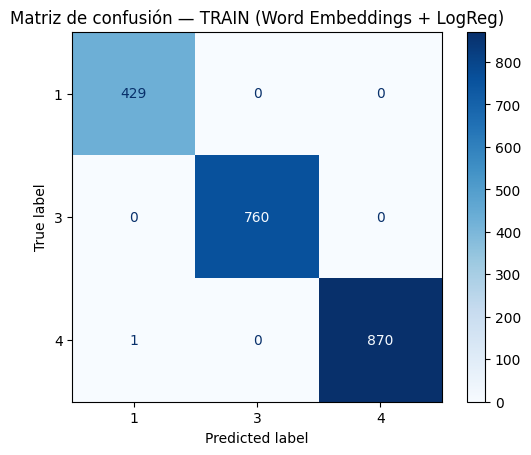

In [42]:
y_train_pred = gcv.best_estimator_.predict(E_tr)

cm = confusion_matrix(y_tr, y_train_pred, labels=np.sort(np.unique(y_all)))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gcv.best_estimator_.classes_)
disp.plot(cmap=plt.cm.Blues)

print("\nTEST — Reporte por clase:")
print(classification_report(y_tr, y_train_pred))

plt.title("Matriz de confusión — TRAIN (Word Embeddings + LogReg)")
plt.show()


TEST — Reporte por clase:
              precision    recall  f1-score   support

           1       0.95      0.95      0.95        76
           3       0.98      0.97      0.97       134
           4       0.99      0.99      0.99       154

    accuracy                           0.98       364
   macro avg       0.97      0.97      0.97       364
weighted avg       0.98      0.98      0.98       364



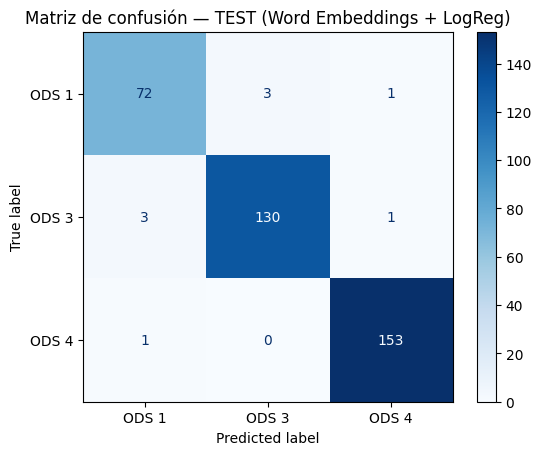

In [43]:
y_hat = gcv.best_estimator_.predict(E_te)

labels = np.sort(np.unique(y_all))
label_names = {1: "ODS 1", 3: "ODS 3", 4: "ODS 4"}
display_labels = [label_names.get(i, str(i)) for i in labels]

cm = confusion_matrix(y_te, y_hat, labels=labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap=plt.cm.Blues)

print("\nTEST — Reporte por clase:")
print(classification_report(y_te, y_hat))

plt.title("Matriz de confusión — TEST (Word Embeddings + LogReg)")
plt.show()


# Inferencia a Excel (embeddings + clasificador)
Pipeline de predicción en lote sobre un archivo externo.
- Carga el bundle guardado y el modelo SBERT por nombre.
- Embedea la columna de texto (texto_col, por defecto Textos_espanol).
- Predice con el clasificador y exporta outputs/predicciones_embeddings.xlsx.
- Llamada de ejemplo incluida al final de la celda.

In [44]:
# Inferencia a Excel con embeddings + clasificador
def predecir_excel_embeddings(path_excel, texto_col="Textos_espanol",
                              bundle_path="models/emb_logreg_bundle.pkl",
                              out_path="outputs/predicciones_embeddings.xlsx"):

    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    bundle = joblib.load(bundle_path)  # {'model_name': ..., 'clf': ...}
    mdl = SentenceTransformer(bundle["model_name"], device=device)

    df_new = pd.read_excel(path_excel)
    if texto_col not in df_new.columns:
        raise ValueError(f"No se encontró la columna '{texto_col}' en el archivo.")

    X_new = df_new[texto_col].astype(str).tolist()
    E_new = mdl.encode(
        X_new, batch_size=128, show_progress_bar=True,
        convert_to_numpy=True, normalize_embeddings=True
    )
    y_new = bundle["clf"].predict(E_new)

    os.makedirs(os.path.dirname(out_path), exist_ok=True)
    df_out = df_new.assign(pred_label=y_new)
    df_out.to_excel(out_path, index=False)
    print(f"OK → {out_path}")


predecir_excel_embeddings("data/Datos de prueba_proyecto.xlsx", texto_col="Textos_espanol")


Batches:   0%|          | 0/2 [00:00<?, ?it/s]

OK → outputs/predicciones_embeddings.xlsx
